In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
hr_df = pd.read_csv( 'HR_comma_sep.csv' )

In [3]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [4]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#find missings values
hr_df.isnull().any().sum()

0

In [7]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [15]:
# 0. How many records of people leaving the company exist in the dataset?
hr_left_df = pd.DataFrame( hr_df.left.value_counts() )
hr_left_df

,count
left,
0,11428
1,3571


In [16]:
#1. What is the percentage of churn by salary bucket
salary_count = hr_df[['salary', 'left']].groupby(['salary', 'left']).size().reset_index()
salary_count.columns = ['salary', 'left', 'count']
salary_count

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129
5,medium,1,1317


In [19]:
salary_percent = (
    salary_count
    / salary_count.groupby(level=0).transform('sum')
).reset_index(name='percent')

salary_percent

,salary,left,percent
0,high,0,0.933711
1,high,1,0.066289
2,low,0,0.703116
3,low,1,0.296884
4,medium,0,0.795687
5,medium,1,0.204313


In [25]:
hr_left_df = hr_left_df.reset_index()

sns.barplot(
    x='left',
    y='count',
    data=hr_left_df
)


<Axes: xlabel='left', ylabel='count'>

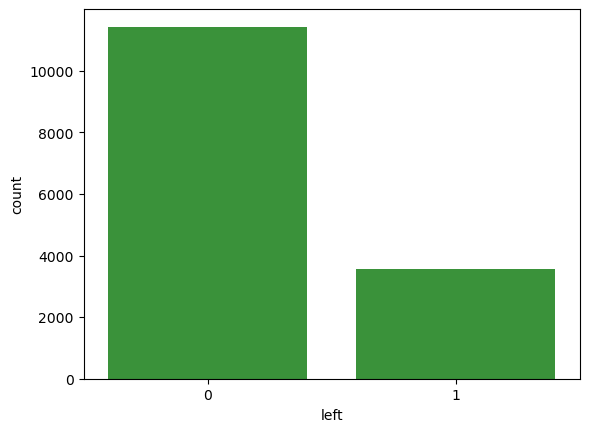

In [28]:
plt.show()

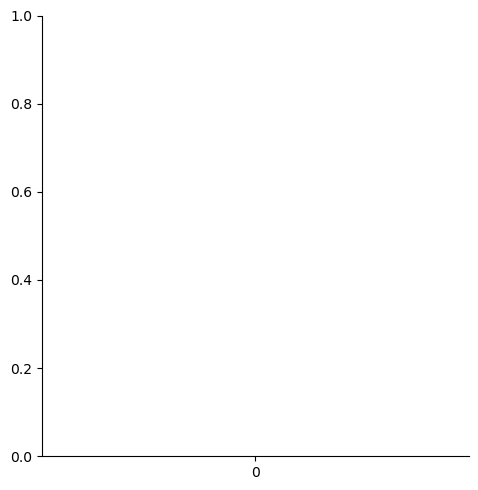

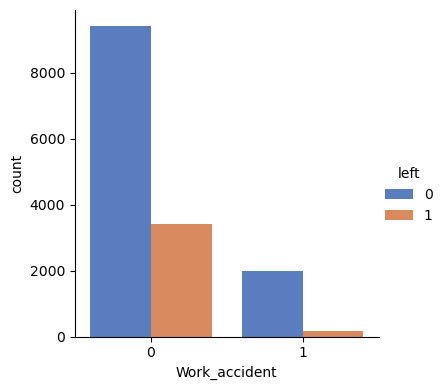

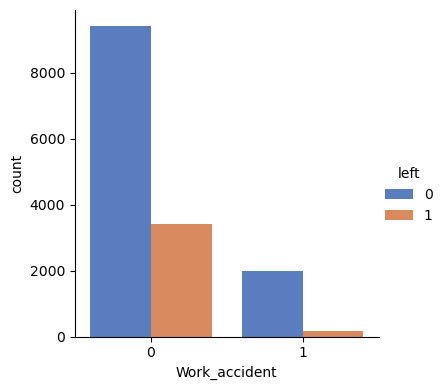

In [34]:
# 2. How many people, who had work accidents, actually left the company?
work_accident_count = hr_df[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size().reset_index()
work_accident_count.columns = ['Work_accident', 'left', 'count']

sns.catplot(
    x="Work_accident",
    y="count",
    hue="left",
    data=work_accident_count,
    kind="bar",
    height=4,
    palette="muted"
)
plt.show()

In [36]:
work_accident_percent = (
    work_accident_count
    / work_accident_count.groupby(level=0).transform('sum')
).reset_index(name='percent')

work_accident_percent


,Work_accident,left,percent
0,0,0,0.734840
1,0,1,0.265160
2,1,0,0.922084
3,1,1,0.077916


In [37]:
work_accident_percent.columns = ['Work_accident', 'left', 'percent']

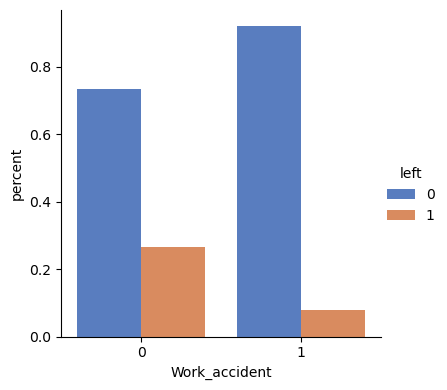

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    x="Work_accident",
    y="percent",
    hue="left",
    data=work_accident_percent,
    kind="bar",
    height=4,
    palette="muted"
)

plt.show()


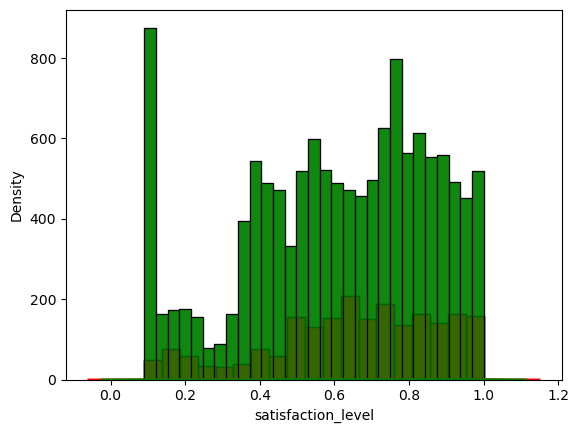

In [42]:
#3. How work accidents have impacted the statisfactin level of the empolyees?
sns.histplot( hr_df[hr_df.Work_accident == 1]['satisfaction_level'], color = 'r')
sns.histplot( hr_df[hr_df.Work_accident == 0]['satisfaction_level'], color = 'g')
plt.show()

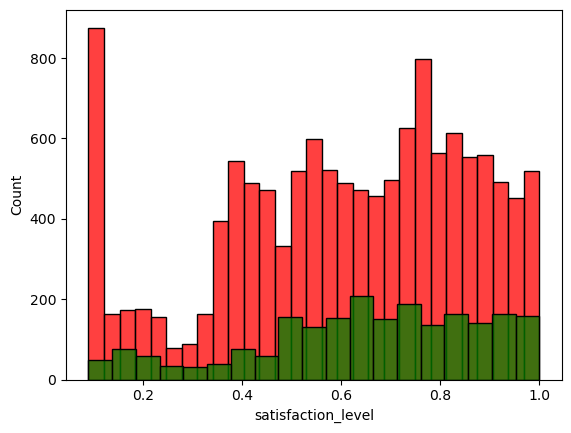

In [43]:
#3. How work accidents have impacted the statisfactin level of the empolyees?
sns.histplot( hr_df[hr_df.Work_accident == 0]['satisfaction_level'], color = 'r')
sns.histplot( hr_df[hr_df.Work_accident == 1]['satisfaction_level'], color = 'g')
plt.show()

In [44]:
#5. Average satisfaction levels for people who leave and stay back in the company
sl_left_mean = np.mean( hr_df[hr_df.left == 0]['satisfaction_level'] )
sl_left_mean

0.666809590479524

In [45]:
np.std( hr_df[hr_df.left == 0]['satisfaction_level'] )

0.21709425554771716

In [46]:
np.mean( hr_df[hr_df.left == 1]['satisfaction_level'] )

0.4400980117614114

In [47]:
np.std( hr_df[hr_df.left == 1]['satisfaction_level'] )

0.2638964784854295

### Hypothesis Test: Does lower satisfaction levels lead to people leaving the company
H0 : Average satisfaction level of people leaving is same as average satisfaction of people staying <br> 
H1 : Average satisfaction level of people leaving is less than as average satisfaction of people staying  

In [48]:
from scipy import stats

stats.ttest_ind( hr_df[hr_df.left == 1]['satisfaction_level'], hr_df[hr_df.left == 0]['satisfaction_level'])

TtestResult(statistic=-51.61280155890104, pvalue=0.0, df=14997.0)

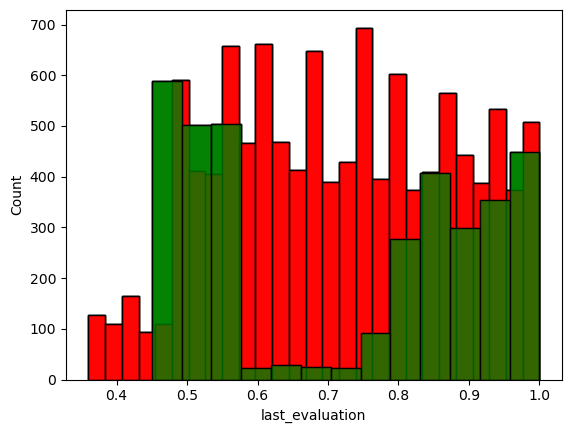

In [51]:
# 6. How last evaluation scores influencing whether to stay or leave the company?
sns.histplot( hr_df[hr_df.left == 0]['last_evaluation'], color = 'r')
sns.histplot( hr_df[hr_df.left == 1]['last_evaluation'], color = 'g')
plt.show()

In [53]:
# 7. How time spent in company influences attrition?
time_spend_count = hr_df[['time_spend_company', 'left']].groupby(['time_spend_company', 'left']).size()
time_spend_percent = (
    time_spend_count
    / time_spend_count.groupby(level=0).transform('sum')
).reset_index(name='percent')


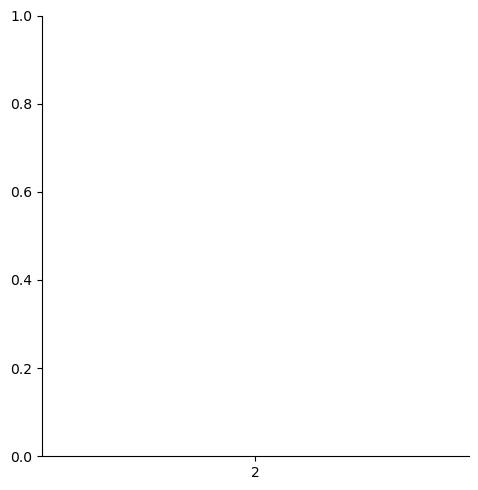

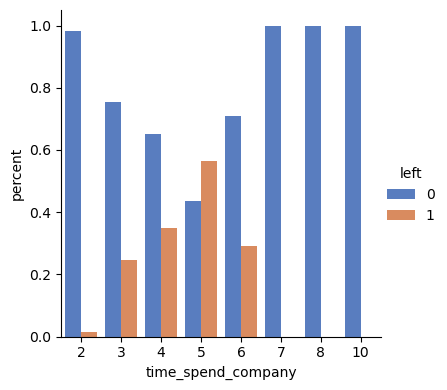

In [56]:
sns.catplot(
    x="time_spend_company",
    y="percent",
    hue="left",
    data=time_spend_percent,
    kind="bar",
    height=4,
    palette="muted"
)

plt.show()

In [59]:
dept_count = hr_df[['department', 'left']] \
    .groupby(['department', 'left']) \
    .size()

dept_count_percent = (
    dept_count
    / dept_count.groupby(level=0).transform('sum')
).reset_index(name='percent')

dept_count_percent.columns = ['dept', 'left', 'percent']
plt.show()


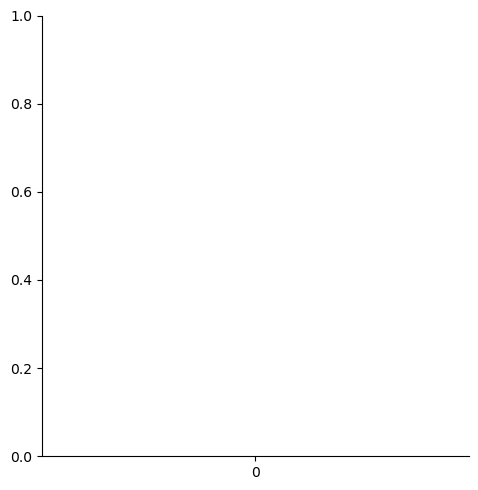

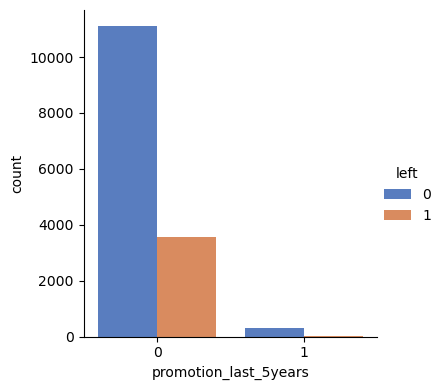

In [62]:
# 9. Effect of whether someone got promoted in last 5 years?
pd.crosstab( hr_df.promotion_last_5years, hr_df.left )
sns.catplot(
    x="promotion_last_5years",
    hue="left",
    data=hr_df,
    kind="count",
    height=4,
    palette="muted"
)

plt.show()

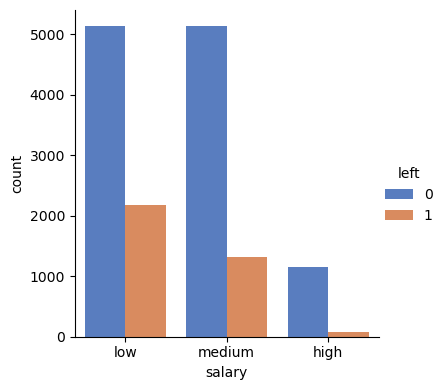

In [63]:
sns.catplot(
    x="salary",
    hue="left",
    data=hr_df,
    kind="count",
    height=4,
    palette="muted"
)

plt.show()

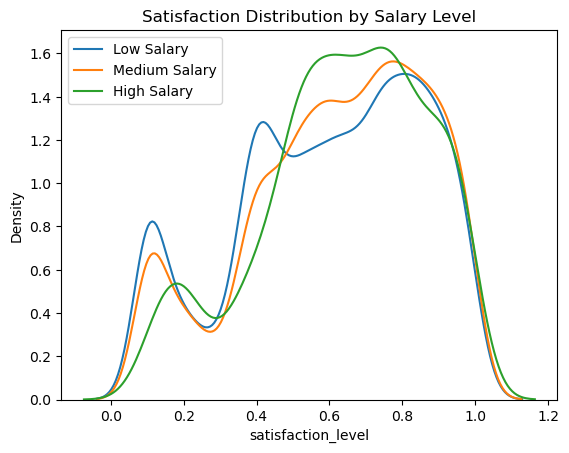

In [64]:
sns.kdeplot(hr_df[hr_df.salary == 'low']['satisfaction_level'], label='Low Salary')
sns.kdeplot(hr_df[hr_df.salary == 'medium']['satisfaction_level'], label='Medium Salary')
sns.kdeplot(hr_df[hr_df.salary == 'high']['satisfaction_level'], label='High Salary')

plt.legend()
plt.title('Satisfaction Distribution by Salary Level')
plt.show()


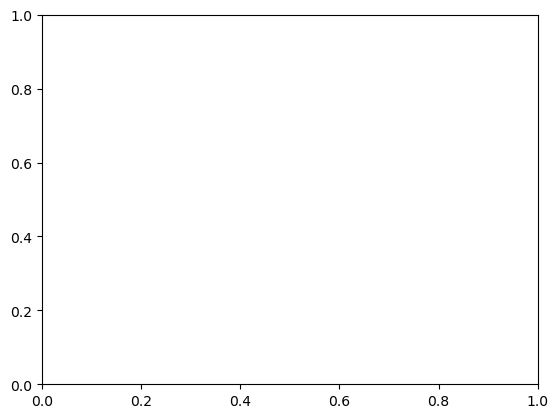

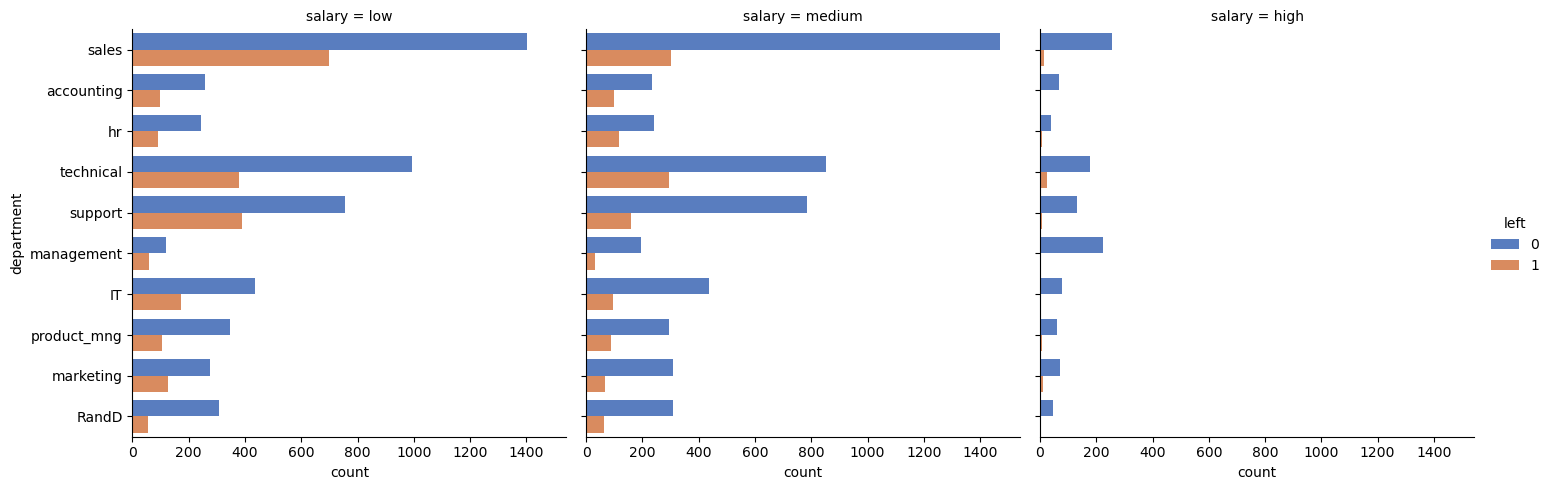

In [66]:
#12.How salaries across departments are related to attrition?
sns.catplot(
    y="department",
    col="salary",
    hue="left",
    data=hr_df,
    kind="count",
    height=5,
    palette="muted"
)

plt.show()

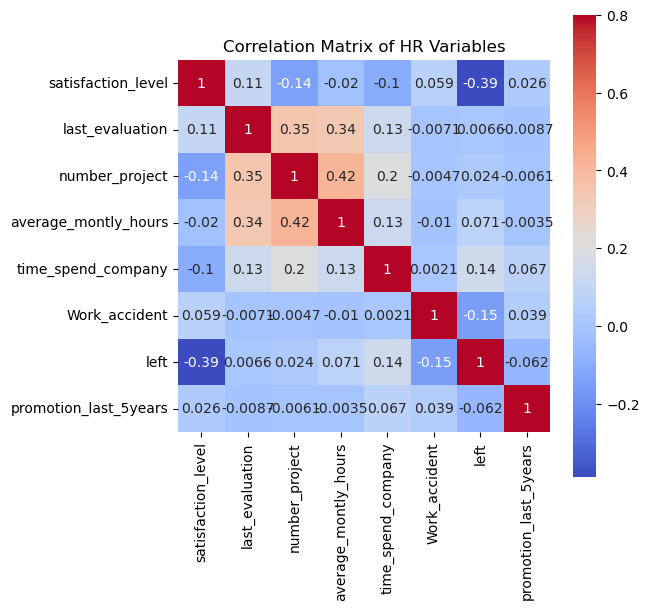

In [67]:
corrmat = hr_df.select_dtypes(include='number').corr()
plt.figure(figsize=(6, 6))
sns.heatmap(
    corrmat,
    vmax=0.8,
    square=True,
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Matrix of HR Variables")
plt.show()


In [68]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [69]:
hr_df.promotion_last_5years.value_counts()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

In [70]:
hr_df.Work_accident.value_counts()

Work_accident
0    12830
1     2169
Name: count, dtype: int64

In [71]:
# Encoding Categorical Features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
     'average_montly_hours', 'time_spend_company']

categorical_features = ['Work_accident','promotion_last_5years', 'department', 'salary']

In [73]:
chi2_score = []
p_val = []

cat_vars = categorical_features
y = hr_df['left']

for col in cat_vars:
    xtab = pd.crosstab(hr_df[col], y)   # ✅ correct
    chi2, p, dof, exp = stats.chi2_contingency(xtab)
    chi2_score.append(chi2)
    p_val.append(p)

result = pd.DataFrame({
    "Column": cat_vars,
    "chi2_score": chi2_score,
    "p_value": p_val
})

result

,Column,chi2_score,p_value
0,Work_accident,357.562360,9.558240e-80
1,promotion_last_5years,56.261627,6.344155e-14
2,department,86.825474,7.042130e-15
3,salary,381.225047,1.652087e-83


In [74]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [75]:
for c_feature in categorical_features:
    hr_df = create_dummies( hr_df, c_feature )

In [76]:
hr_df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,False,False,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,1,False,False,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,1,False,False,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,1,False,False,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,1,False,False,False,False,False,False,False,False,True,False,False,True,False


In [77]:
#Splitting the data

feature_columns = hr_df.columns.difference( ['left'] )
feature_columns

Index(['Work_accident_1', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years_1', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [78]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( hr_df[feature_columns],
                                                  hr_df['left'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [82]:
# Building Models
from sklearn.linear_model import LogisticRegression
logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

logreg.fit(train_X, train_y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [84]:
logreg.named_steps['model'].coef_


array([[-0.53346299,  0.24954767, -0.11669902,  0.03448749,  0.09137933,
        -0.05846399,  0.045105  ,  0.02054837,  0.05482887,  0.06462628,
         0.09288253,  0.11380847, -0.3844518 , -0.20774984,  0.99642876,
         0.73691017, -1.0410451 ,  0.392319  ]])

In [86]:
list(zip(
    feature_columns,
    logreg.named_steps['model'].coef_[0]
))


[('Work_accident_1', -0.5334629877521063),
 ('average_montly_hours', 0.24954767056160443),
 ('department_RandD', -0.11669902210782557),
 ('department_accounting', 0.034487490644097056),
 ('department_hr', 0.09137933467668644),
 ('department_management', -0.05846399227414337),
 ('department_marketing', 0.045105002774220825),
 ('department_product_mng', 0.020548372642881983),
 ('department_sales', 0.05482887392908275),
 ('department_support', 0.06462628414989396),
 ('department_technical', 0.09288253442698095),
 ('last_evaluation', 0.11380847044025028),
 ('number_project', -0.3844517985846299),
 ('promotion_last_5years_1', -0.20774983948045406),
 ('salary_low', 0.9964287581449741),
 ('salary_medium', 0.736910173187774),
 ('satisfaction_level', -1.0410450966261064),
 ('time_spend_company', 0.39231899585134705)]

In [87]:
logreg.named_steps['model'].intercept_


array([-1.60471122])

In [88]:
logreg.predict_proba(test_X)

array([[0.97214389, 0.02785611],
       [0.92208144, 0.07791856],
       [0.76755491, 0.23244509],
       ...,
       [0.89648798, 0.10351202],
       [0.88604031, 0.11395969],
       [0.60507172, 0.39492828]])

In [89]:
#Predicting the test cases
hr_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [90]:
hr_test_pred
hr_test_pred = hr_test_pred.reset_index()


In [91]:
#Comparing the predictions with actual test data
hr_test_pred.sample( n = 10 )

,index,actual,predicted
1988,11427,0,0
1072,2495,0,0
2804,12480,1,1
1674,5361,0,0
1343,2595,0,0
2526,13251,0,0
1186,4667,0,0
2204,6956,0,0
1021,11092,0,0
1022,14441,1,0


In [94]:
cm = metrics.confusion_matrix(
    hr_test_pred.actual,
    hr_test_pred.predicted,
    labels=[1, 0]
)

cm

array([[ 237,  469],
       [ 178, 2116]], dtype=int64)

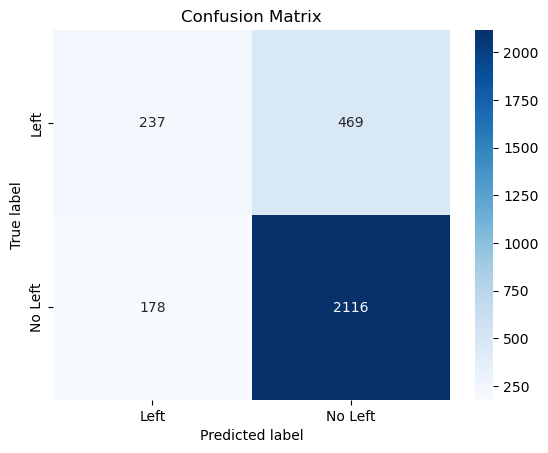

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    cm,
    annot=True,
    fmt='d',                     # ✅ integer format
    cmap='Blues',
    xticklabels=["Left", "No Left"],
    yticklabels=["Left", "No Left"]
)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [96]:
score = metrics.accuracy_score( hr_test_pred.actual, hr_test_pred.predicted )
round( float(score), 2 )

0.78

Overall test accuracy is 78%. But it is not a good measure. The result is very high as there are lots of cases which are no left and the model has predicted most of them as no left. <br>
The objective of the model is to indentify the people who will leave, so that the company can intervene and act.<br>
This might be the case as the default model assumes people with more than 0.5 probability will not leave the company

In [97]:
# Predit Probability
print(test_X[:1])
print(logreg.predict_proba( test_X[:1] ))

      Work_accident_1  average_montly_hours  department_RandD  \
6723             True                   226             False   

      department_accounting  department_hr  department_management  \
6723                  False          False                  False   

      department_marketing  department_product_mng  department_sales  \
6723                  True                   False             False   

      department_support  department_technical  last_evaluation  \
6723               False                 False             0.96   

      number_project  promotion_last_5years_1  salary_low  salary_medium  \
6723               5                    False       False           True   

      satisfaction_level  time_spend_company  
6723                0.65                   2  
[[0.97214389 0.02785611]]


In [98]:
#How good the model is?
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_df.head()

,0,1
0,0.972144,0.027856
1,0.922081,0.077919
2,0.767555,0.232445
3,0.520612,0.479388
4,0.976588,0.023412


In [99]:
hr_test_pred = pd.concat( [hr_test_pred, predict_proba_df], axis = 1 )

In [100]:
hr_test_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']
hr_test_pred

,index,actual,predicted,Left_0,Left_1
0,6723,0,0,0.972144,0.027856
1,6473,0,0,0.922081,0.077919
2,4679,0,0,0.767555,0.232445
3,862,1,0,0.520612,0.479388
4,7286,0,0,0.976588,0.023412
...,...,...,...,...,...
2995,3297,0,0,0.621442,0.378558
2996,14113,0,0,0.939057,0.060943
2997,5514,0,0,0.896488,0.103512
2998,9939,0,0,0.886040,0.113960


In [101]:
auc_score = metrics.roc_auc_score( hr_test_pred.actual, hr_test_pred.Left_1  )
round( float( auc_score ), 2 )

0.81

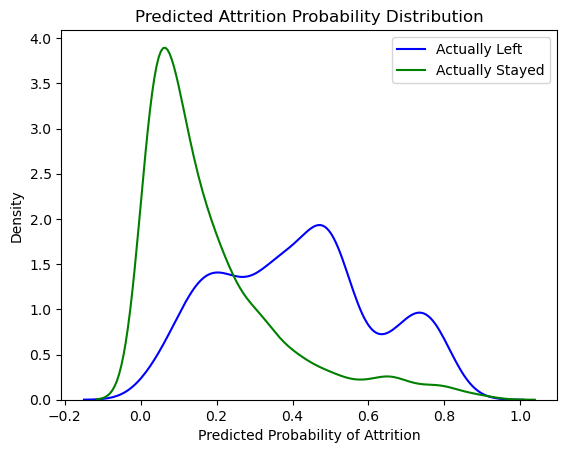

In [102]:
sns.kdeplot(
    hr_test_pred[hr_test_pred.actual == 1]["Left_1"],
    color='b',
    label='Actually Left'
)

sns.kdeplot(
    hr_test_pred[hr_test_pred.actual == 0]["Left_1"],
    color='g',
    label='Actually Stayed'
)

plt.xlabel('Predicted Probability of Attrition')
plt.ylabel('Density')
plt.title('Predicted Attrition Probability Distribution')
plt.legend()
plt.show()

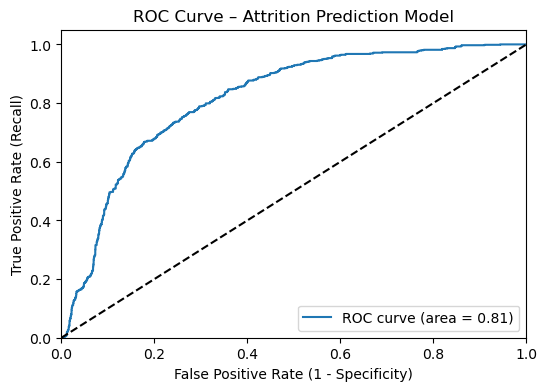

In [103]:

# ROC values
fpr, tpr, thresholds = metrics.roc_curve(
    hr_test_pred.actual,
    hr_test_pred.Left_1,
    drop_intermediate=False
)

# AUC score
auc_score = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve – Attrition Prediction Model')
plt.legend(loc="lower right")
plt.show()

In [104]:
print(thresholds[0:10])
print(fpr[0:10])
print(tpr[0:10])

[       inf 0.92219421 0.90570368 0.89033443 0.88601724 0.88538591
 0.87744282 0.87644571 0.86567636 0.86497263]
[0.         0.00087184 0.00130776 0.00174368 0.0021796  0.00261552
 0.00305144 0.00348736 0.00392328 0.0043592 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [106]:
cutoff_prob = thresholds[(np.abs(tpr - 0.7)).argmin()]

In [107]:
round( float( cutoff_prob ), 2 )

0.28

In [108]:
#Predicting with new cut-off probability
hr_test_pred['new_labels'] = hr_test_pred['Left_1'].map( lambda x: 1 if x >= 0.28 else 0 )

In [109]:
hr_test_pred[0:10]

,index,actual,predicted,Left_0,Left_1,new_labels
0,6723,0,0,0.972144,0.027856,0
1,6473,0,0,0.922081,0.077919,0
2,4679,0,0,0.767555,0.232445,0
3,862,1,0,0.520612,0.479388,1
4,7286,0,0,0.976588,0.023412,0
5,8127,0,0,0.721045,0.278955,0
6,3017,0,0,0.986303,0.013697,0
7,3087,0,1,0.123554,0.876446,1
8,6425,0,0,0.765609,0.234391,0
9,2250,0,1,0.390207,0.609793,1


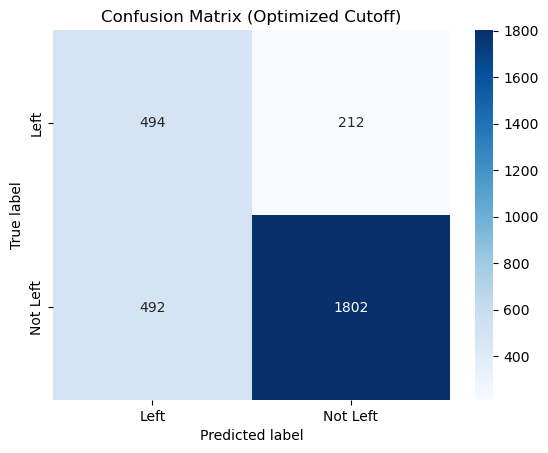

In [110]:
cm = metrics.confusion_matrix(
    hr_test_pred.actual,
    hr_test_pred.new_labels,
    labels=[1, 0]          # ✅ keyword argument
)

sns.heatmap(
    cm,
    annot=True,
    fmt='d',               # ✅ integer format
    cmap='Blues',
    xticklabels=["Left", "Not Left"],
    yticklabels=["Left", "Not Left"]
)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix (Optimized Cutoff)')
plt.show()